In [16]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
x = df.loc[:, ["petal length (cm)", "petal width (cm)"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, iris.target, test_size=0.25, random_state=0
)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

from skqulacs.circuit.pre_defined import create_qcl_ansatz,create_farhi_neven_ansatz
from skqulacs.qnn import QNNClassifier
from skqulacs.qnn.solver import Bfgs

In [17]:
nqubit = 5                      # qubitの数。必要とする入力、出力の次元数以上が必要である。
c_depth = 2                     # circuitの深さ。ニューラルネットワークでの隠れ層に対応する。
time_step = 1.                  # qcl_ansatz に必要となるパラメータ。横磁場イジングモデルによって発展させる時間を決める。
num_class = 3                   # 分類数（ここでは3つの品種に分類）
solver = Bfgs()                   # アルゴリズム。ほかには、`Adam()` や `NelderMead()` が使える。
maxiter = 20                   # ループの最大。これが多いほど、正確になるが、時間がかかる。
# circuit = create_qcl_ansatz(nqubit, c_depth, time_step)     # LearningCircuitを作る
circuit = create_farhi_neven_ansatz(nqubit, c_depth,0)

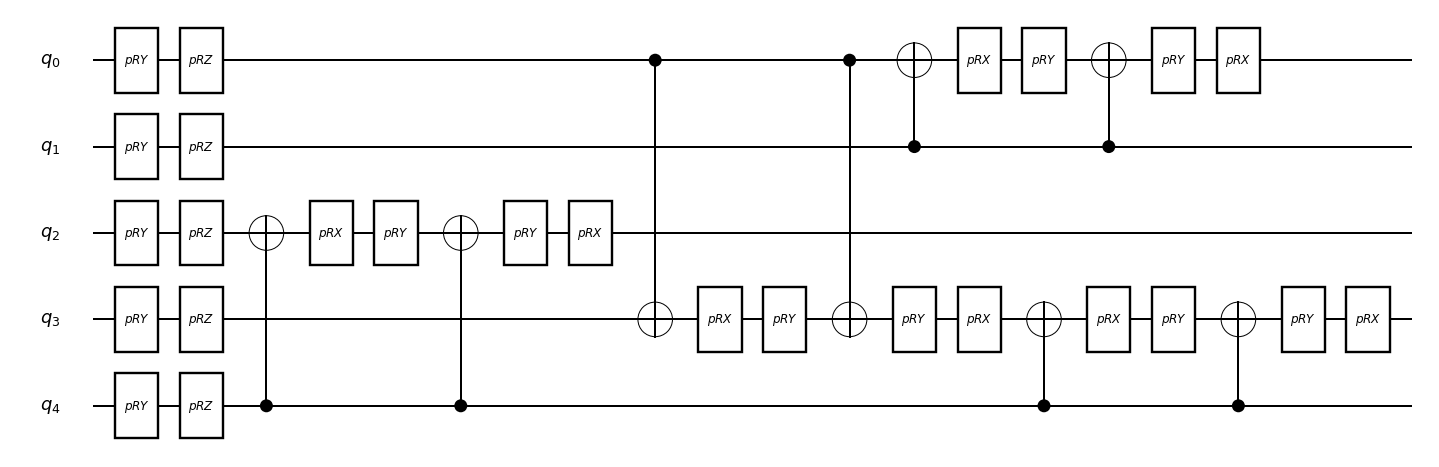

In [18]:
from qulacsvis import circuit_drawer
circuit_drawer(circuit._circuit,"mpl")

In [19]:
qcl = QNNClassifier(circuit, num_class, solver)     # モデル構築を行う
qcl.circuit._circuit.get_parameter_count()
print(circuit.get_parameters())
print(f"{len(circuit.get_parameters())=}")
print(f"{x_train[3]=}")
state = qcl.circuit.run(x_train[0])
param_count = 0
for i in range(qcl.circuit._circuit.get_gate_count()):
    name = qcl.circuit._circuit.get_gate(i).get_name()
    print(name,circuit._circuit.get_parameter(param_count) if qcl.circuit._circuit.get_gate(i).is_parametric() else "")
    if qcl.circuit._circuit.get_gate(i).is_parametric():
        param_count += 1
    if name == "DenseMatrix":
        # print(qcl.circuit._circuit.get_gate(i).get_matrix())
        pass
# opt_loss, opt_params = qcl.fit(x_train, y_train, maxiter)                          # 学習
# print("trained parameters", opt_params)
# print("loss", opt_loss)

[0.10384619671527331, 5.109927617709579, -3.811604993109835, -5.735012432197602, 4.583562073612696, 3.415696558991173, -5.126159064066656, -5.8752333142921085, 0.21102439329246717, 4.584560380312186, -5.423513122375916, -1.1036768144935105, 3.402101183476623, 1.8831453470115125, -0.17793774164533058, -2.6558221377616955]
len(circuit.get_parameters())=16
x_train[3]=array([1.3, 0.2])
ParametricRY 1.5707963267948966
ParametricRZ 0.0
ParametricRY 1.5707963267948966
ParametricRZ 0.0
ParametricRY 1.5707963267948966
ParametricRZ 0.0
ParametricRY 1.5707963267948966
ParametricRZ 0.0
ParametricRY 1.5707963267948966
ParametricRZ 0.0
CNOT 
ParametricRX 0.10384619671527331
ParametricRY 5.109927617709579
CNOT 
ParametricRY -3.811604993109835
ParametricRX -5.735012432197602
CNOT 
ParametricRX 4.583562073612696
ParametricRY 3.415696558991173
CNOT 
ParametricRY -5.126159064066656
ParametricRX -5.8752333142921085
CNOT 
ParametricRX 0.21102439329246717
ParametricRY 4.584560380312186
CNOT 
ParametricRY -5

In [20]:
from qulacs import Observable, QuantumState
obs = Observable(5)
obs.add_operator(1.0, "Z 0")
exp = obs.get_expectation_value(state)
print(f"{exp*2.2=}")

res = qcl._predict_inner(x_train)
print(f"{res=}")


exp*2.2=-0.10186750386926588
res=array([[-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-2.06988596e+00,  2.15555097e+00, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.71793224e+00,  1.76000000e+00, -4.51422300e-01],
       [-2.06988596e+00,  2.15555097e+00, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       [-1.01867504e-01, -1.41206491e-16, -4.51422300e-01],
       

In [21]:
print(qcl.fit(x_train, y_train, maxiter))                          # 学習9

theta_init=[0.10384619671527331, 5.109927617709579, -3.811604993109835, -5.735012432197602, 4.583562073612696, 3.415696558991173, -5.126159064066656, -5.8752333142921085, 0.21102439329246717, 4.584560380312186, -5.423513122375916, -1.1036768144935105, 3.402101183476623, 1.8831453470115125, -0.17793774164533058, -2.6558221377616955]
len(theta_init)=16
theta[:4]=array([ 0.1038462 ,  5.10992762, -3.81160499, -5.73501243])
theta[:4]=array([ 1.1038462 ,  5.10992762, -3.81160499, -5.73501243])
theta[:4]=array([ 0.1038462 ,  6.10992762, -3.81160499, -5.73501243])
theta[:4]=array([ 0.1038462 ,  5.10992762, -2.81160499, -5.73501243])
theta[:4]=array([ 0.1038462 ,  5.10992762, -3.81160499, -4.73501243])
theta[:4]=array([ 0.1038462 ,  5.10992762, -3.81160499, -5.73501243])
theta[:4]=array([ 0.1038462 ,  5.10992762, -3.81160499, -5.73501243])
theta[:4]=array([ 0.1038462 ,  5.10992762, -3.81160499, -5.73501243])
theta[:4]=array([ 0.1038462 ,  5.10992762, -3.81160499, -5.73501243])
theta[:4]=array([

In [22]:
y_pred = qcl.predict(x_test)
print(y_pred)
print(y_test)
from scipy.special import softmax
from sklearn.metrics import log_loss
y_pred_sm = softmax(y_pred, axis=1)
log = log_loss(y_test, y_pred_sm)
print(log)


[[ 1.00774096e+00  8.79235779e-01  2.01805784e+00]
 [ 1.85787850e+00  2.13014084e+00  2.04047496e+00]
 [ 1.34163381e-01  8.79235779e-01  2.49809541e-01]
 [ 1.22083026e+00  1.99993055e+00  1.01163832e+00]
 [ 1.62032308e-01  8.79235779e-01  3.25610344e-01]
 [ 3.95815227e-01  1.52655666e-17  1.38740843e+00]
 [ 7.91415720e-05  1.21609576e+00  1.77806528e-01]
 [ 1.95494190e+00  2.16922925e+00  2.10723170e+00]
 [ 1.98784071e+00  2.19234780e+00  2.09434531e+00]
 [ 1.89635079e+00  2.20000000e+00  2.04047496e+00]
 [ 1.91092301e+00  2.19234780e+00  1.75052353e+00]
 [ 1.94487886e+00  2.16922925e+00  2.11538300e+00]
 [ 2.01525409e+00  2.19234780e+00  2.10723170e+00]
 [ 1.95111074e+00  2.16922925e+00  2.11418466e+00]
 [ 1.98402144e+00  2.19234780e+00  2.10723170e+00]
 [ 5.42300140e-01  3.27825555e-08  2.49809541e-01]
 [ 1.94487886e+00  2.16922925e+00  2.11538300e+00]
 [ 1.97569952e+00  2.19234780e+00  2.11099195e+00]
 [ 3.56471696e-02  1.21609576e+00  2.49809541e-01]
 [-4.75845618e-02  1.45516322e+